In [19]:
import numpy as np
import cvxpy as cp

m = 29
n = 36

P = np.matrix([
 [0.166667,  0.111111,  0.083333,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.166667,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.111111,  0.083333,  0.173437,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.083333,  0.000000,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.083333,  0.000000,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.083333,  0.000000,  0.115439,  0.086163,  0.187216,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.086163,  0.000000,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.086163,  0.000000,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.086163,  0.000000,  0.125382,  0.095840,  0.217975,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.095840,  0.000000,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.095840,  0.000000,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.095840,  0.000000,  0.140170,  0.109240,  0.253971,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.109240,  0.000000,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.109240,  0.000000,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.109240,  0.000000,  0.167774,  0.126970,  0.310248,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.126970,  0.000000,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.126970,  0.000000,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.126970,  0.000000,  0.207073,  0.158951,  0.410903,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.158951,  0.000000,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.158951,  0.000000,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  0.000000,  0.000000,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.158951,  0.000000,  0.273974,  0.202873,  0.526401,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.202873,  0.000000,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.202873,  0.000000,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.202873,  0.000000,  0.364610,  0.278455,  0.763876,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.278455,  0.000000,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.278455,  0.000000,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.278455,  0.000000,  0.515549,  0.383991,  1.094606,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.383991,  0.000000,  0.740793,],
 [0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.000000,  0.383991,  0.000000,  0.740793,]
])

e = np.matrix([
  0.000000,
  1.000000,
  2.000000,
  3.000000,
  4.000000,
  5.000000,
  6.000000,
  7.000000,
  8.000000,
  16.000000,
  16.600000,
  17.200000,
  17.800000,
  18.400000,
  19.000000,
  19.600000,
  20.200000,
  18.000000,
  17.000000,
  16.000000,
  15.000000,
  14.000000,
  13.000000,
  12.000000,
  11.000000,
  10.000000,
  9.000000,
  8.000000,
  7.000000,
  6.000000,
  5.000000,
  4.000000,
  3.000000,
  2.000000,
  1.000000,
  0.000000,
]).T

rho = 0.002500



In [20]:
# Initializing m investment type matrix
x = cp.Variable((m,1))
# Initializing matrix that contain expense covered by bank over n time periods
b = cp.Variable((n,1))
# Initializing withdrawals matrix
w = cp.Variable((n,1))

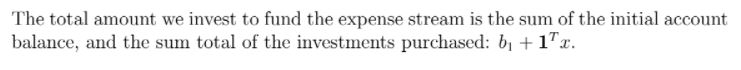

In [21]:
# Total amount we invest to fund the expense stream
def Total_Amount(x, b):
  return b[0] + np.ones(m).T@x


In [22]:
Objective = cp.Minimize(Total_Amount(x, b))
Constraints = [x >= 0, b >= 0, w + P@x >= e]

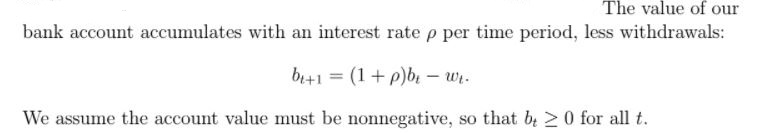

In [23]:
for i in range(n-1) :
  Constraints.append(b[i+1] == (1+rho)*b[i] - w[i])

In [24]:
prob = cp.Problem(Objective, Constraints)
prob.solve()

177.51278714600377

In [27]:
# Printing Outputs
print(f"--------------------------------")
print(f"Expenses_Matrix: \n {x.value}")
print(f"--------------------------------")
print(f"Bank_Balance_Matrix: \n {b.value} ")
print(f"--------------------------------")
print(f"Withdrawals_Matrix: \n {w.value} ")
print(f"--------------------------------")
print("Final expense cost: ", Total_Amount(x, b).value, "USD")
print(f"--------------------------------")


--------------------------------
Expenses_Matrix: 
 [[5.99000051e+00]
 [3.63492982e-10]
 [2.36894484e-10]
 [2.78227834e+01]
 [3.37391617e-10]
 [1.92300856e-10]
 [9.17602239e-09]
 [3.15701040e-10]
 [1.67424329e-10]
 [6.87532209e+01]
 [1.95292271e-10]
 [1.20465673e-10]
 [1.34366441e+01]
 [2.00653054e-10]
 [1.09420337e-10]
 [3.49639858e+01]
 [2.00692425e-10]
 [9.98705087e-11]
 [9.76826781e+00]
 [1.96433775e-10]
 [6.85576363e-11]
 [1.01880248e+01]
 [1.77769170e-10]
 [9.40558832e-11]
 [4.31666822e+00]
 [2.62909279e-10]
 [7.34798748e-11]
 [2.27319166e+00]
 [1.16292632e-10]]
--------------------------------
Bank_Balance_Matrix: 
 [[1.58919094e-10]
 [9.98335416e-01]
 [9.99166670e-01]
 [2.30414881e-09]
 [2.82383551e+00]
 [4.65473060e+00]
 [5.49020293e+00]
 [5.32776395e+00]
 [3.16658345e+00]
 [2.91893083e-10]
 [3.81198341e+00]
 [2.20799669e+00]
 [3.21697248e-10]
 [5.99001251e-01]
 [5.99500003e-01]
 [2.44962456e-09]
 [9.64650792e+00]
 [3.73064878e+00]
 [1.41059001e-10]
 [1.27383514e+00]
 [1.38336